<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Установка-компонентов" data-toc-modified-id="Установка-компонентов-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Установка компонентов</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Указание-констант" data-toc-modified-id="Указание-констант-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Указание констант</a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Изучение-датасета" data-toc-modified-id="Изучение-датасета-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение датасета</a></span></li><li><span><a href="#Лематизация-текста" data-toc-modified-id="Лематизация-текста-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лематизация текста</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение на выборки</a></span><ul class="toc-item"><li><span><a href="#Обработка-с-помощью-TF-IDF" data-toc-modified-id="Обработка-с-помощью-TF-IDF-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Обработка с помощью TF-IDF</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 
<hr>

**Задача:** Обучить модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

**Цель:** Построить модель со значением метрики качества *F1* не меньше 0.75. 

**Этапы:**

1. Загрузить и подготовить данные.
2. Обучить модели. 
3. Сделайть выводы.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

### Установка компонентов

In [1]:
%%capture
!pip install phik
!pip install mlxtend
!pip install -U scikit-learn
!pip install tqdm
import sys
!{sys.executable} -m pip install spacy
# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en

### Импорт библиотек

In [10]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import timeit
import warnings
import spacy

from tqdm.auto import tqdm

warnings.filterwarnings("ignore") 

#библиотеки для работы с текстами
import re
import torch
import transformers
import nltk
from tqdm import notebook
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

nltk.download('averaged_perceptron_tagger')

#библиотеки для работы с графиками
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions
from itertools import combinations

#класс для разделения данных на выборки
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    KFold,
    TimeSeriesSplit,
    RandomizedSearchCV, 
    GridSearchCV
)

#модели
from sklearn.svm import SVC
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

#метрики
from phik.report import plot_correlation_matrix
from phik import phik_matrix
from sklearn.metrics import(
    confusion_matrix, 
    accuracy_score,
    f1_score,
    fbeta_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    mean_squared_error
)

#классы подготовки данных
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler, 
)

# класс для работы с пропусками
from sklearn.impute import SimpleImputer 

#класс для работы с пайплайнами
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Указание констант

In [3]:
TEST_SIZE = 0.2
state = np.random.RandomState(12345)

## Подготовка

### Изучение датасета

In [4]:
data = pd.read_csv('/datasets/toxic_comments.csv', index_col = [0])
display(data.head())
data.info()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [5]:
data.duplicated().sum()

0

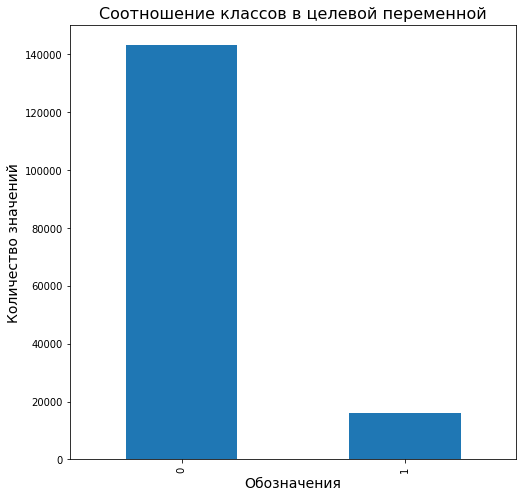

In [6]:
data['toxic'].value_counts().plot(
    kind = 'bar',
    figsize = (8, 8)
)
plt.title('Соотношение классов в целевой переменной', fontsize = 16)
plt.ylabel('Количество значений', fontsize = 14)
plt.xlabel('Обозначения', fontsize = 14);

Пропусов и дубликатов в данных нет, заголовки подходят под стандарт snake_case, типы данных соотвестсвуют содержанию. В целевом признаке наблюдается дисбаланс классов, бороться будем стратификацией по целевому признаку при разделении на выборки и с помощью средств моделей - параметра class_weights

### Лематизация текста

In [42]:
nlp = spacy.load("en_core_web_sm")

lem = WordNetLemmatizer()

def lematize(text):
    text = text.lower()
    spacy_text = nlp(text)
    lem_text = " ".join([token.lemma_ for token in spacy_text])
    
    cleared_text = re.sub(r'[^a-zA-Z]', ' ', lem_text)
    
    return " ".join(cleared_text.split())

In [44]:
tqdm.pandas()

data['lem_text'] = data['text'].progress_apply(lematize)
display(data.head())
data.info()

  0%|          | 0/159292 [00:00<?, ?it/s]

,text,toxic,lem_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edit make under my usernam...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour I be see...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man I be really not try to edit war it be ...
3,"""\nMore\nI can't make any real suggestions on ...",0,more I can not make any real suggestion on imp...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      159292 non-null  object
 1   toxic     159292 non-null  int64 
 2   lem_text  159292 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [45]:
data = data.drop('text', axis = 1)
data.head()

,toxic,lem_text
0,0,explanation why the edit make under my usernam...
1,0,d aww he match this background colour I be see...
2,0,hey man I be really not try to edit war it be ...
3,0,more I can not make any real suggestion on imp...
4,0,you sir be my hero any chance you remember wha...


### Разделение на выборки

In [46]:
X = data['lem_text']
y = data['toxic']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE,
    stratify = y
)


print(f'Размер тестовой выборки {X_train.shape} и целевого {y_train.shape}')
print(f'Размер тестовой выборки {X_test.shape} и целевого {y_test.shape}')

Размер тестовой выборки (127433,) и целевого (127433,)
Размер тестовой выборки (31859,) и целевого (31859,)


#### Обработка с помощью TF-IDF

In [47]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

count_tf = TfidfVectorizer(stop_words = list(stop_words))

X_train_tf = count_tf.fit_transform(X_train)
X_test_tf = count_tf.transform(X_test)

print(f'Размер тестовой выборки {X_train_tf.shape} и целевого {y_train.shape}')
print(f'Размер тестовой выборки {X_test_tf.shape} и целевого {y_test.shape}')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Размер тестовой выборки (127433, 134623) и целевого (127433,)
Размер тестовой выборки (31859, 134623) и целевого (31859,)


## Обучение

Для обучения возьмем три модели: LogisticRegression, DecisionTreeClassifier, CatBoostClassifier

### LogisticRegression

In [48]:
model = LogisticRegression(
    penalty = 'l1',
    solver = 'liblinear',
    random_state = state,
    class_weight = 'balanced'
)

parameters = {
    'C': range(1, 10)
}

search = GridSearchCV(
    model,
    parameters,
    scoring = 'f1',
    cv = 4,
    n_jobs = -1
)

In [49]:
search.fit(X_train_tf, y_train)

display('Лучшие параметры:', search.best_params_)
display(f'Лучшая метрика при кросс-валидации: {search.best_score_:.3f}')

result = pd.DataFrame(search.cv_results_).head().sort_values(by = 'mean_test_score', ascending = False)
display(result[['mean_fit_time', 'param_C', 'mean_test_score']])

'Лучшие параметры:'

{'C': 3}

'Лучшая метрика при кросс-валидации: 0.761'

,mean_fit_time,param_C,mean_test_score
2,2.425425,3,0.761216
3,2.620951,4,0.760653
4,2.779442,5,0.759612
1,2.208826,2,0.759353
0,1.318553,1,0.750515


### DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(random_state = state, class_weight = 'balanced')

parameters = {
    'max_depth': range(2, 10),
    'min_samples_leaf': range(1, 10),
    'min_samples_split': range(2, 10),
}

search_dtc = RandomizedSearchCV(
    model,
    parameters,
    scoring = 'f1',
    cv = 4,
    n_jobs = -1
)

In [51]:
search_dtc.fit(X_train_tf, y_train)

display('Лучшие параметры:', search_dtc.best_params_)
display(f'Лучшая метрика при кросс-валидации: {search_dtc.best_score_:.2f}')

result = pd.DataFrame(search_dtc.cv_results_).head().sort_values(by = 'mean_test_score', ascending = False)
display(result[['mean_fit_time', 'params', 'mean_test_score']])

'Лучшие параметры:'

{'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 9}

'Лучшая метрика при кросс-валидации: 0.56'

,mean_fit_time,params,mean_test_score
0,13.497309,"{'min_samples_split': 7, 'min_samples_leaf': 4...",0.563978
1,11.737900,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.476968
3,10.221436,"{'min_samples_split': 7, 'min_samples_leaf': 7...",0.376453
2,10.568385,"{'min_samples_split': 7, 'min_samples_leaf': 8...",0.237240
4,9.659108,"{'min_samples_split': 7, 'min_samples_leaf': 5...",0.216867


### CatBoostClassifier

In [52]:
model = CatBoostClassifier(depth = 5, n_estimators = 50, verbose = 25)

score = cross_val_score(
    model,
    X_train_tf,
    y_train,
    scoring = 'f1',
    cv = 4,
    n_jobs = -1
).mean()

display(f'Метрика при кросс-валидации: {score:.2f}')

Learning rate set to 0.5
0:	learn: 0.3432502	total: 1.6s	remaining: 1m 18s
25:	learn: 0.1564987	total: 31.2s	remaining: 28.8s
49:	learn: 0.1360526	total: 58.6s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3481393	total: 1.52s	remaining: 1m 14s
25:	learn: 0.1588043	total: 31.7s	remaining: 29.3s
49:	learn: 0.1383330	total: 58.8s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3357886	total: 1.67s	remaining: 1m 21s
25:	learn: 0.1568852	total: 31.7s	remaining: 29.2s
49:	learn: 0.1379183	total: 58.9s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3558074	total: 1.46s	remaining: 1m 11s
25:	learn: 0.1582347	total: 31.2s	remaining: 28.8s
49:	learn: 0.1377936	total: 58.5s	remaining: 0us


'Метрика при кросс-валидации: 0.71'

### Тестирование лучшей модели

Лучший показатель метрики у модели логистической регрессии. Проверим модель на тренировочных данных.

In [53]:
model = search.best_estimator_
model

LogisticRegression(C=3, class_weight='balanced', penalty='l1',
                   random_state=RandomState(MT19937) at 0x7F92373EB340,
                   solver='liblinear')

In [54]:
predict = model.predict(X_test_tf)
f1 = f1_score(y_test, predict)

print(f'Метрика на тестовых данных: {f1:.3f}')

Метрика на тестовых данных: 0.770


## Выводы

При изучении датасета был выявлен дисбаланс классов в целевом признаке, для его устранения была применена стратификация по целевому признаку при разделении на выборки и средство моделей - параметра class_weights. 

При обучении моделей лучшей себя показала Логистическая регрессия, справившись быстрее остальных моделей и показав значение метрики F1 = 76 на тренировочных и F1 = 77 на тестовых данных со следующими параметрами:
- penalty = 'l1',
- solver = 'liblinear',
- random_state = state,
- class_weight = 'balanced',
- С = 3

Модель успешно разделяет позитивные и негативные комментарии в 77% случаев.